# Price Cut NYC Decision Tree

### Data Cleanup

The following property types were eliminated from the original CSV:
1. Lot/Land

In [1]:
# Dependencies
import pandas as pd
from pathlib import Path

In [2]:
# Name of the CSV file
file_path = Path("Resources/Zillow_New_York_For_Sale.csv")
df = pd.read_csv(file_path)
df

,Property URL,MLS ID,Listing description,Property type,Number of days on Zillow,Property price (USD),Price was cut,Price cut amount (USD),Price cut date (MM/DD/YYYY),Living area,...,Bedrooms,Bathrooms,Broker name,Broker agent,Street address,City,Zip,State,Country,FederalInt
0,https://www.zillow.com/homedetails/110-62-Coro...,NaN,Apartment for sale,Apartment,116.0,2328000,No,NaN,NaN,3425.0,...,8.0,4.0,P R O Links Realty Inc,NaN,110-62 Corona Ave,Corona,11368,NY,USA,5.53
1,https://www.zillow.com/homedetails/112-50-Nort...,NaN,Condo for sale,Condominium,10.0,168888,No,NaN,NaN,NaN,...,2.0,1.0,Coldwell Banker American Homes,NaN,112-50 Northern Boulevard UNIT G6G,Corona,11368,NY,USA,5.53
2,https://www.zillow.com/homedetails/9910-60th-A...,NaN,Condo for sale,Condominium,24.0,419888,No,NaN,NaN,NaN,...,3.0,2.0,Coldwell Banker American Homes,NaN,99-10 60th A Avenue UNIT 1H,Flushing,11368,NY,USA,5.53
3,https://www.zillow.com/homedetails/112-50-Nort...,NaN,Condo for sale,Condominium,1.0,168888,No,NaN,NaN,NaN,...,2.0,1.0,Century 21 American Homes,NaN,112-50 Northern Blvd #G6,Corona,11368,NY,USA,5.53
4,https://www.zillow.com/homedetails/99-30-59th-...,NaN,Condo for sale,Condominium,1.0,250000,No,NaN,NaN,800.0,...,1.0,1.0,"Apartment Luxe Realty Group, Inc",NaN,99-30 59th Ave #4A,Queens,11368,NY,USA,5.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,https://www.zillow.com/homedetails/104-29-Roos...,NaN,New construction,Unknown,869.0,3700000,No,NaN,NaN,8461.0,...,14.0,6.0,First Home Equity Realty,NaN,104-29 Roosevelt Avenue,Corona,11368,NY,USA,5.53
146,https://www.zillow.com/homedetails/58-12-Grang...,NaN,New construction,Unknown,116.0,2668000,Yes,82000.0,11/16/23,NaN,...,10.0,8.0,E Realty International Corp,NaN,58-12 Granger Street,Corona,11368,NY,USA,5.53
147,https://www.zillow.com/homedetails/57-59-Grang...,NaN,New construction,Unknown,63.0,1560000,No,NaN,NaN,3400.0,...,9.0,4.0,Coldwell Banker American Homes,NaN,57-59 Granger Street UNIT 3,Corona,11368,NY,USA,5.53
148,https://www.zillow.com/homedetails/106-19-50th...,NaN,New construction,Unknown,276.0,549000,Yes,999.0,11/8/23,641.0,...,2.0,1.0,EXP Realty,NaN,106-19 50th Avenue UNIT 2E,Corona,11368,NY,USA,5.53


In [3]:
# Clean the dataframe by replacing NaN values with 0
df.fillna(0, inplace=True)

In [4]:
df

,Property URL,MLS ID,Listing description,Property type,Number of days on Zillow,Property price (USD),Price was cut,Price cut amount (USD),Price cut date (MM/DD/YYYY),Living area,...,Bedrooms,Bathrooms,Broker name,Broker agent,Street address,City,Zip,State,Country,FederalInt
0,https://www.zillow.com/homedetails/110-62-Coro...,0.0,Apartment for sale,Apartment,116.0,2328000,No,0.0,0,3425.0,...,8.0,4.0,P R O Links Realty Inc,0.0,110-62 Corona Ave,Corona,11368,NY,USA,5.53
1,https://www.zillow.com/homedetails/112-50-Nort...,0.0,Condo for sale,Condominium,10.0,168888,No,0.0,0,0.0,...,2.0,1.0,Coldwell Banker American Homes,0.0,112-50 Northern Boulevard UNIT G6G,Corona,11368,NY,USA,5.53
2,https://www.zillow.com/homedetails/9910-60th-A...,0.0,Condo for sale,Condominium,24.0,419888,No,0.0,0,0.0,...,3.0,2.0,Coldwell Banker American Homes,0.0,99-10 60th A Avenue UNIT 1H,Flushing,11368,NY,USA,5.53
3,https://www.zillow.com/homedetails/112-50-Nort...,0.0,Condo for sale,Condominium,1.0,168888,No,0.0,0,0.0,...,2.0,1.0,Century 21 American Homes,0.0,112-50 Northern Blvd #G6,Corona,11368,NY,USA,5.53
4,https://www.zillow.com/homedetails/99-30-59th-...,0.0,Condo for sale,Condominium,1.0,250000,No,0.0,0,800.0,...,1.0,1.0,"Apartment Luxe Realty Group, Inc",0.0,99-30 59th Ave #4A,Queens,11368,NY,USA,5.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,https://www.zillow.com/homedetails/104-29-Roos...,0.0,New construction,Unknown,869.0,3700000,No,0.0,0,8461.0,...,14.0,6.0,First Home Equity Realty,0.0,104-29 Roosevelt Avenue,Corona,11368,NY,USA,5.53
146,https://www.zillow.com/homedetails/58-12-Grang...,0.0,New construction,Unknown,116.0,2668000,Yes,82000.0,11/16/23,0.0,...,10.0,8.0,E Realty International Corp,0.0,58-12 Granger Street,Corona,11368,NY,USA,5.53
147,https://www.zillow.com/homedetails/57-59-Grang...,0.0,New construction,Unknown,63.0,1560000,No,0.0,0,3400.0,...,9.0,4.0,Coldwell Banker American Homes,0.0,57-59 Granger Street UNIT 3,Corona,11368,NY,USA,5.53
148,https://www.zillow.com/homedetails/106-19-50th...,0.0,New construction,Unknown,276.0,549000,Yes,999.0,11/8/23,641.0,...,2.0,1.0,EXP Realty,0.0,106-19 50th Avenue UNIT 2E,Corona,11368,NY,USA,5.53


In [5]:
# Import scikit-learn libraries including Decision Tree Classifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [6]:
# Convert 'Price was cut' to a binary indicator (0 and 1)
df['Price was cut'] = df['Price was cut'].apply(lambda x: 1 if x == 'Yes' else 0)
df.tail()

,Property URL,MLS ID,Listing description,Property type,Number of days on Zillow,Property price (USD),Price was cut,Price cut amount (USD),Price cut date (MM/DD/YYYY),Living area,...,Bedrooms,Bathrooms,Broker name,Broker agent,Street address,City,Zip,State,Country,FederalInt
145,https://www.zillow.com/homedetails/104-29-Roos...,0.0,New construction,Unknown,869.0,3700000,0,0.0,0,8461.0,...,14.0,6.0,First Home Equity Realty,0.0,104-29 Roosevelt Avenue,Corona,11368,NY,USA,5.53
146,https://www.zillow.com/homedetails/58-12-Grang...,0.0,New construction,Unknown,116.0,2668000,1,82000.0,11/16/23,0.0,...,10.0,8.0,E Realty International Corp,0.0,58-12 Granger Street,Corona,11368,NY,USA,5.53
147,https://www.zillow.com/homedetails/57-59-Grang...,0.0,New construction,Unknown,63.0,1560000,0,0.0,0,3400.0,...,9.0,4.0,Coldwell Banker American Homes,0.0,57-59 Granger Street UNIT 3,Corona,11368,NY,USA,5.53
148,https://www.zillow.com/homedetails/106-19-50th...,0.0,New construction,Unknown,276.0,549000,1,999.0,11/8/23,641.0,...,2.0,1.0,EXP Realty,0.0,106-19 50th Avenue UNIT 2E,Corona,11368,NY,USA,5.53
149,https://www.zillow.com/homedetails/5814-Grange...,0.0,New construction,Unknown,80.0,2680000,0,0.0,0,0.0,...,10.0,8.0,E Realty International Corp,0.0,58-14 Granger Street,Flushing,11368,NY,USA,5.53


In [7]:
# Feature selection
# Selecting relevant features and the target variable
X = df[['Property price (USD)', 'Property type', 'Living area', 'Lot/land area', 'Bedrooms', 'Bathrooms', 'City', 'FederalInt']]

y = df['Price was cut']


In [8]:
# Handle the categorical variables
categorical_features = ['Property type', 'City']
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    X.loc[:,col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [9]:
df

,Property URL,MLS ID,Listing description,Property type,Number of days on Zillow,Property price (USD),Price was cut,Price cut amount (USD),Price cut date (MM/DD/YYYY),Living area,...,Bedrooms,Bathrooms,Broker name,Broker agent,Street address,City,Zip,State,Country,FederalInt
0,https://www.zillow.com/homedetails/110-62-Coro...,0.0,Apartment for sale,Apartment,116.0,2328000,0,0.0,0,3425.0,...,8.0,4.0,P R O Links Realty Inc,0.0,110-62 Corona Ave,Corona,11368,NY,USA,5.53
1,https://www.zillow.com/homedetails/112-50-Nort...,0.0,Condo for sale,Condominium,10.0,168888,0,0.0,0,0.0,...,2.0,1.0,Coldwell Banker American Homes,0.0,112-50 Northern Boulevard UNIT G6G,Corona,11368,NY,USA,5.53
2,https://www.zillow.com/homedetails/9910-60th-A...,0.0,Condo for sale,Condominium,24.0,419888,0,0.0,0,0.0,...,3.0,2.0,Coldwell Banker American Homes,0.0,99-10 60th A Avenue UNIT 1H,Flushing,11368,NY,USA,5.53
3,https://www.zillow.com/homedetails/112-50-Nort...,0.0,Condo for sale,Condominium,1.0,168888,0,0.0,0,0.0,...,2.0,1.0,Century 21 American Homes,0.0,112-50 Northern Blvd #G6,Corona,11368,NY,USA,5.53
4,https://www.zillow.com/homedetails/99-30-59th-...,0.0,Condo for sale,Condominium,1.0,250000,0,0.0,0,800.0,...,1.0,1.0,"Apartment Luxe Realty Group, Inc",0.0,99-30 59th Ave #4A,Queens,11368,NY,USA,5.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,https://www.zillow.com/homedetails/104-29-Roos...,0.0,New construction,Unknown,869.0,3700000,0,0.0,0,8461.0,...,14.0,6.0,First Home Equity Realty,0.0,104-29 Roosevelt Avenue,Corona,11368,NY,USA,5.53
146,https://www.zillow.com/homedetails/58-12-Grang...,0.0,New construction,Unknown,116.0,2668000,1,82000.0,11/16/23,0.0,...,10.0,8.0,E Realty International Corp,0.0,58-12 Granger Street,Corona,11368,NY,USA,5.53
147,https://www.zillow.com/homedetails/57-59-Grang...,0.0,New construction,Unknown,63.0,1560000,0,0.0,0,3400.0,...,9.0,4.0,Coldwell Banker American Homes,0.0,57-59 Granger Street UNIT 3,Corona,11368,NY,USA,5.53
148,https://www.zillow.com/homedetails/106-19-50th...,0.0,New construction,Unknown,276.0,549000,1,999.0,11/8/23,641.0,...,2.0,1.0,EXP Realty,0.0,106-19 50th Avenue UNIT 2E,Corona,11368,NY,USA,5.53


In [10]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Initializing and training the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [12]:
# Make predictions
y_pred = clf.predict(X_test)


In [13]:
# Evaluating the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.6
Confusion Matrix:
 [[17  3]
 [ 9  1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.85      0.74        20
           1       0.25      0.10      0.14        10

    accuracy                           0.60        30
   macro avg       0.45      0.47      0.44        30
weighted avg       0.52      0.60      0.54        30



# Initial Result of the Decision Tree Model

### Accuracy Score
The accuracy score of 0.6 (or 60%) indicates that the model correctly predicts the outcome (whether the price will be cut or not) in approximately 60% of the cases. This metric provides a general idea of the model's overall performance but doesn't detail its effectiveness in distinguishing between the two classes.



### Conclusion:

We need to fit more features feature into the dataframe to see if it can provide a better prediction. One suggestion is to include a "neighborhood" feature, but that is difficult to get in Zillow.


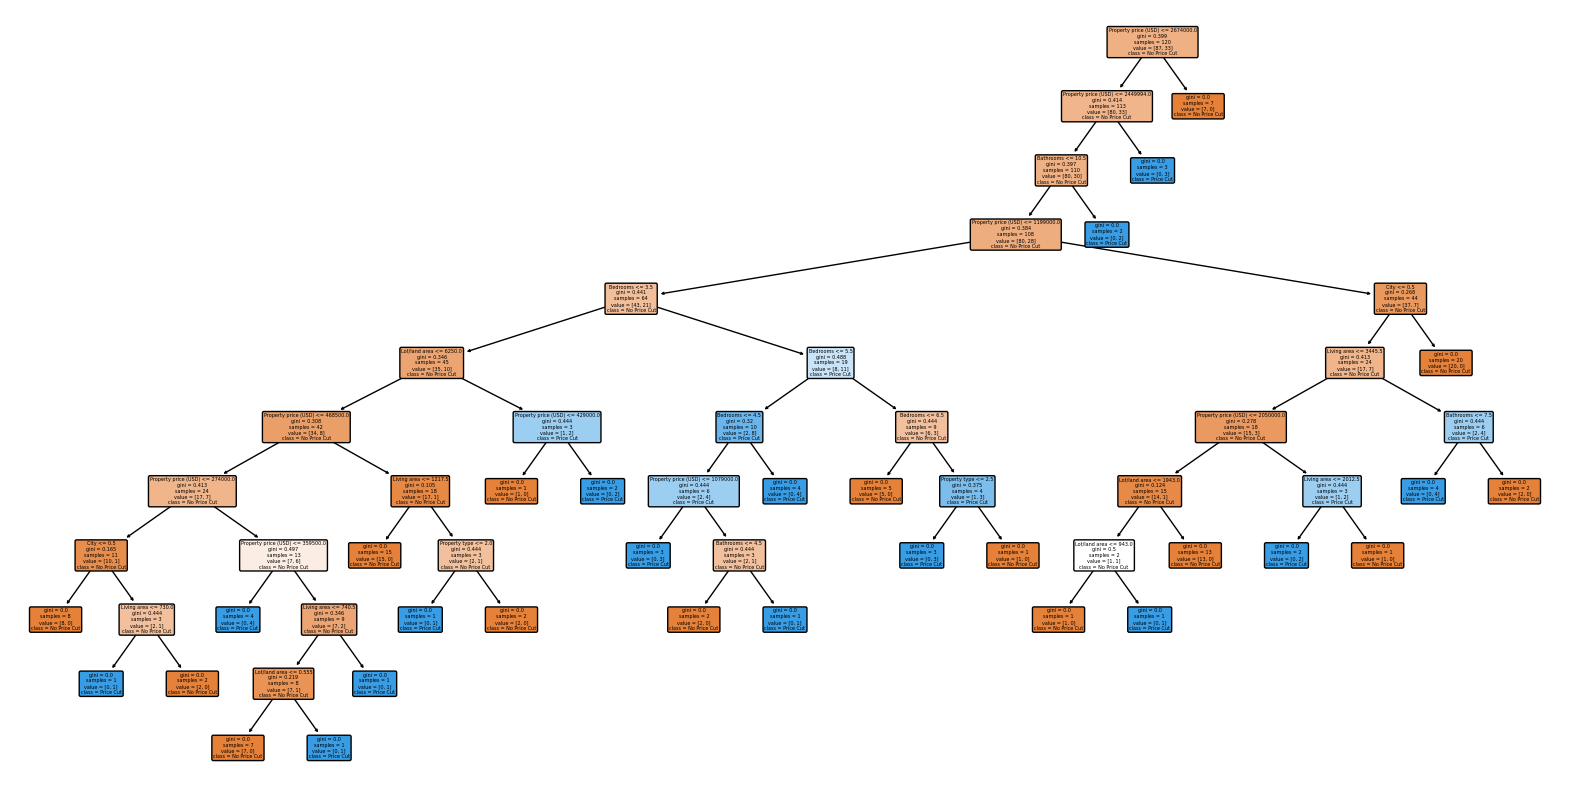

In [14]:
# Visualizing the Decision Tree

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, rounded=True, class_names=["No Price Cut", "Price Cut"], feature_names=X.columns)
plt.show()
